# Title
## Subtitle

Simple text here

* Bullet points 
* Can be made like this

Math type 1: $3^{x} + 4y = \sum_{i=1}x_i$

Math type 2: $$3^{x} + 4y = \sum_{i=1}x_i$$

[Perceptron tutorial](https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53)

In [1]:
using Plots

In [2]:
function make_random_linearSeparable_data(n, ϵ)
    w = rand(2)
    w[2] = w[2]/5
    Data = rand(n,2)
    Data = [(Data[i,1], Data[i,2]) for i = 1:n 
            if abs(Data[i,2] - w[1]*Data[i,1] - w[2]) > ϵ]
                
    Y = [Data[i][2] > w[1]*Data[i][1] + w[2] ? 1 : -1 for i = 1:size(Data)[1]]
    
    return Data, Y, w
end

make_random_linearSeparable_data (generic function with 1 method)

In [3]:
D, Y, coeff = make_random_linearSeparable_data(50, 0.02)

(Tuple{Float64,Float64}[(0.449995, 0.252434), (0.836461, 0.775458), (0.409209, 0.322739), (0.508395, 0.408973), (0.821942, 0.782762), (0.278044, 0.844786), (0.514721, 0.742289), (0.179631, 0.195372), (0.205069, 0.135339), (0.0434985, 0.7612)  …  (0.716133, 0.61969), (0.495157, 0.222435), (0.406095, 0.636402), (0.393362, 0.868187), (0.782811, 0.917124), (0.439998, 0.513556), (0.331797, 0.0803404), (0.883367, 0.791796), (0.007009, 0.715988), (0.146807, 0.488894)], [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1  …  -1, -1, 1, 1, 1, 1, -1, -1, 1, 1], [0.882987, 0.0967036])

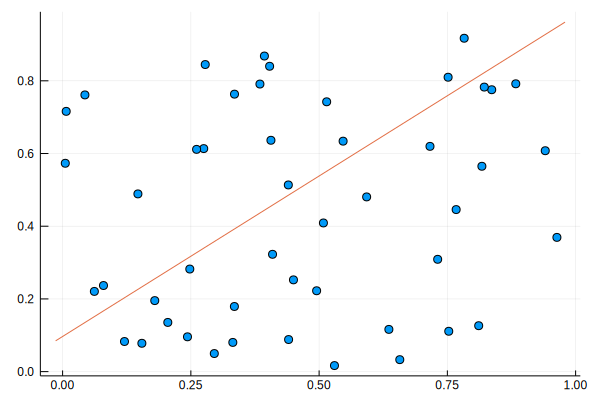

In [4]:
scatter(D, leg = false)
plot!(x -> coeff[1]*x + coeff[2])

In [5]:
function perceptron(data, labels, w)
        
    # Define hypothesis function 
    h(x) = w'*[1.0, x[1], x[2]] < 0 ? -1 : 1
    
    for i = 1:size(data)[1]
        if h(data[i]) != labels[i]
            w += labels[i]*[1.0, data[i][1], data[i][2]]
        end
    end
    return w
end  

perceptron (generic function with 1 method)

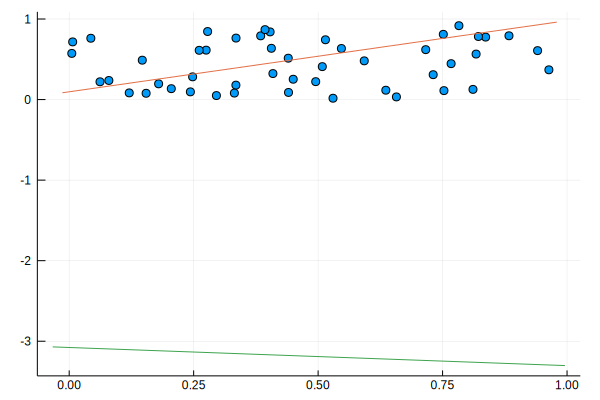

In [6]:
w = rand(3)
plot!(x -> (-w[1]-w[2]*x)/w[3], label = "h_1(x)")

In [7]:
w = perceptron(D, Y, w)

3-element Array{Float64,1}:
 -0.4672512980699597
 -2.3937703862831397
  2.5252988623012174

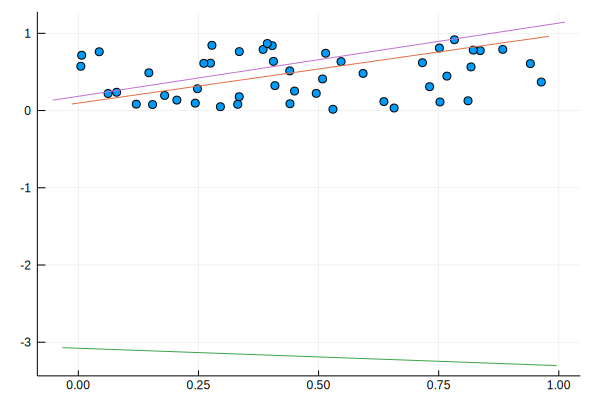

In [8]:
plot!(x -> (-w[1]-w[2]*x)/w[3])

In [9]:
w = perceptron(D, Y, w)

3-element Array{Float64,1}:
 -0.4672512980699597
 -2.9932519583022703
  2.8361307911968807

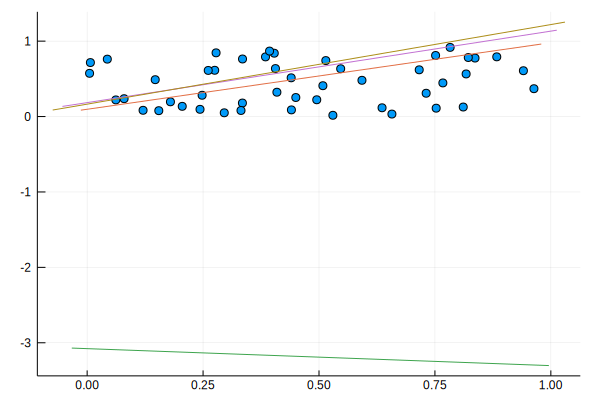

In [10]:
plot!(x -> (-w[1]-w[2]*x)/w[3])